# Testing the Simulator

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [4]:
sim.datalogging_start()

for i in range(100):
    sim.update()

sim.datalogging_stop()


{'status': 200, 'headers': {}, 'body': '{}'}

In [5]:
id_last = json.loads(sim.datalogging_lastSession()['body'])['uuid']

df2 = sim.get_log(id_last, interval_ms = 1000)

In [6]:
df2

acu.time.internal_time  acu.azimuth.p_act  \
2022-07-05T08:52:50.767186Z            59765.286699                0.0   
2022-07-05T08:52:51.767186Z            59765.286710                0.0   
2022-07-05T08:52:52.767186Z            59765.286722                0.0   
2022-07-05T08:52:53.767186Z            59765.286733                0.0   
2022-07-05T08:52:54.767186Z            59765.286745                0.0   
2022-07-05T08:52:55.767186Z            59765.286757                0.0   
2022-07-05T08:52:56.767186Z            59765.286768                0.0   
2022-07-05T08:52:57.767186Z            59765.286780                0.0   
2022-07-05T08:52:58.767186Z            59765.286791                0.0   
2022-07-05T08:52:59.767186Z            59765.286803                0.0   
2022-07-05T08:53:00.767186Z            59765.286814                0.0   
2022-07-05T08:53:01.767186Z            59765.286826                0.0   
2022-07-05T08:53:02.767186Z            59765.286838                0.0   
2022-07-05T08:53:03.767186Z            59765.286849                0.0   
2022-07-05T08:53:04.767186Z            59765.286861                0.0   
2022-07-05T08:53:05.767186Z            59765.286872                0.0   
2022-07-05T08:53:06.767186Z            59765.286884                0.0   
2022-07-05T08:53:07.767186Z            59765.286895                0.0   
2022-07-05T08:53:08.767186Z            59765.286907                0.0   
2022-07-05T08:53:09.767186Z            59765.286919                0.0   
2022-07-05T08:53:10.767186Z            59765.286919                0.0   

                             acu.azimuth.p_set  acu.elevation.p_act  \
2022-07-05T08:52:50.767186Z                0.0                  0.0   
2022-07-05T08:52:51.767186Z                0.0                  0.0   
2022-07-05T08:52:52.767186Z                0.0                  0.0   
2022-07-05T08:52:53.767186Z                0.0                  0.0   
2022-07-05T08:52:54.767186Z                0.0                  0.0   
2022-07-05T08:52:55.767186Z                0.0                  0.0   
2022-07-05T08:52:56.767186Z                0.0                  0.0   
2022-07-05T08:52:57.767186Z                0.0                  0.0   
2022-07-05T08:52:58.767186Z                0.0                  0.0   
2022-07-05T08:52:59.767186Z                0.0                  0.0   
2022-07-05T08:53:00.767186Z                0.0                  0.0   
2022-07-05T08:53:01.767186Z                0.0                  0.0   
2022-07-05T08:53:02.767186Z                0.0                  0.0   
2022-07-05T08:53:03.767186Z                0.0                  0.0   
2022-07-05T08:53:04.767186Z                0.0                  0.0   
2022-07-05T08:53:05.767186Z                0.0                  0.0   
2022-07-05T08:53:06.767186Z                0.0                  0.0   
2022-07-05T08:53:07.767186Z                0.0                  0.0   
2022-07-05T08:53:08.767186Z                0.0                  0.0   
2022-07-05T08:53:09.767186Z                0.0                  0.0   
2022-07-05T08:53:10.767186Z                0.0                  0.0   

                             acu.elevation.p_set  \
2022-07-05T08:52:50.767186Z                  0.0   
2022-07-05T08:52:51.767186Z                  0.0   
2022-07-05T08:52:52.767186Z                  0.0   
2022-07-05T08:52:53.767186Z                  0.0   
2022-07-05T08:52:54.767186Z                  0.0   
2022-07-05T08:52:55.767186Z                  0.0   
2022-07-05T08:52:56.767186Z                  0.0   
2022-07-05T08:52:57.767186Z                  0.0   
2022-07-05T08:52:58.767186Z                  0.0   
2022-07-05T08:52:59.767186Z                  0.0   
2022-07-05T08:53:00.767186Z                  0.0   
2022-07-05T08:53:01.767186Z                  0.0   
2022-07-05T08:53:02.767186Z                  0.0   
2022-07-05T08:53:03.767186Z                  0.0   
2022-07-05T08:53:04.767186Z                  0.0   
2022-

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

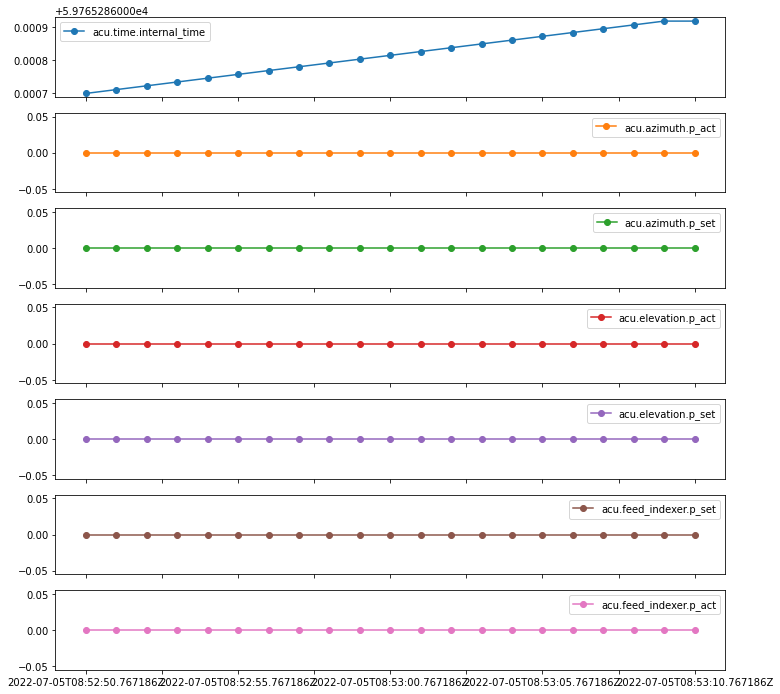

In [7]:
df2.plot(subplots=True, figsize=(12,12), style ='-o')

## Test a Track Table

In [8]:
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [9]:


def mk_dummy_table(source, t0 = Time.now(), duration_s = 1000, dt = 1.0):
    
    
    time = t0 + np.arange(0, duration_s, dt) * u.s

    mpi_lat = '-30:43:04.7'
    mpi_lon = '21:24:46.9'
    mpi_alt = 1086.0
    observer = EarthLocation(lat=mpi_lat, lon=mpi_lon, height=mpi_alt)

    altaz = source.transform_to(AltAz(obstime=time,location=observer))

    t, az, el = np.array(time.mjd), np.array(altaz.az), np.array(altaz.alt)
    return t, az, el


In [10]:
# sources = """1 Aur,4.85
# 1 Gem,4.75
# 1 Pup,4.60
# 1 Sgr,4.95
# 1 Vul,4.75
# 10 Leo,5.00
# 10 LMi,4.50
# 10 Tau,4.25
# 11 Com,4.70
# 2 Mon,5.00
# 71 Oph,4.60
# 61 Vir,4.70
# 41 Ari,3.60
# 31 Ori,4.70
# 106 Her,4.90
# 2 Aur,4.75
# 3 Cen,4.50
# 41 Com,4.80
# 70 Peg,4.50
# 71 Tau,4.45
# 11 Ori,4.65
# 111 Tau,5.00
# 21 Lyn,4.60
# 12 Com,4.75
# 102 Her,4.35
# 72 Leo,4.55
# 14 Com,4.90
# 104 Her,4.95
# 110 Her,4.15
# 110 Vir,4.35
# 111 Her,4.30
# 140 Pup,4.95
# 2 Cen,4.15
# 2 Cet,4.55
# 2 Sex,4.65
# 2 Sgr,4.50
# 20 Boo,4.80
# 20 Cet,4.75
# 20 CVn,4.70
# 20 Mon,4.90
# 20 Oph,4.60
# 20 Pup,4.95
# 28 Mon,4.65
# 29 CMa,4.85
# 30 LMi,4.70
# 30 Oph,4.80
# 31 Leo,4.35
# 31 Com,4.90
# 31 Boo,4.85
# 31 Lyn,4.25
# 21 LMi,4.45
# 4 Aql,5.00
# 4 Pup,5.00
# 40 Leo,4.75
# 42 Lib,4.95
# 42 Her,4.85
# 23 Ori,4.95
# 13 Pup,4.35
# 14 Aur,5.00
# 15 Ori,4.80""".split('\n')

Text(0.5, 0.98, '10 Tau')

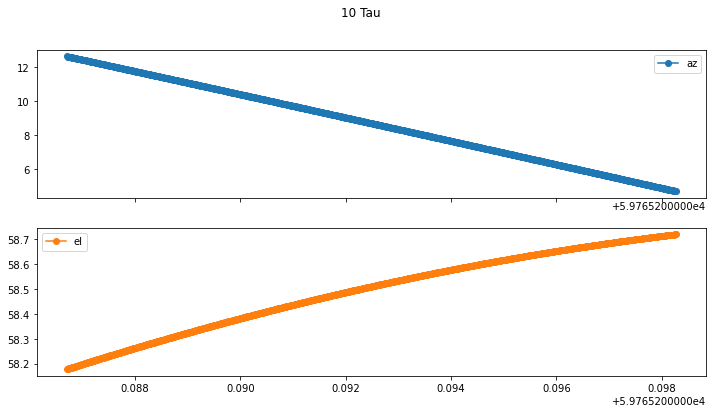

In [11]:
# for src in sources:
#     src = src.split(',')[0]
src = '10 Tau'
source = SkyCoord.from_name(src)
t, az, el = mk_dummy_table(source, duration_s=1000)

dft = pd.DataFrame( dict(az=az, el=el), index=t)
dft.plot(subplots=True, figsize=(12,6), style ='-o')
plt.suptitle(src)

In [12]:
mkline = lambda t, az, el: '{:.12f} {:.6f} {:.6f} {:.0f} {:.6f} \n'.format(float(t), float(az), float(el), 1, 0.0)
tracktable = ''.join([mkline(ti, azi, eli) for ti, azi, eli in zip(t, az, el)])

In [13]:
body = tracktable

In [14]:
sim.program_track(body)

sim.datalogging_start()

for i in range(1000):
    sim.update()

sim.datalogging_stop()


{'status': 200, 'headers': {}, 'body': '{}'}

In [15]:
id_last = json.loads(sim.datalogging_lastSession()['body'])['uuid']

dfacu = sim.get_log(id_last, interval_ms = 1000)

In [16]:
for c in dfacu.columns:
    if '.p_act' in c or '.p_set' in c:
        dfacu[c] = dfacu[c].astype(float)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

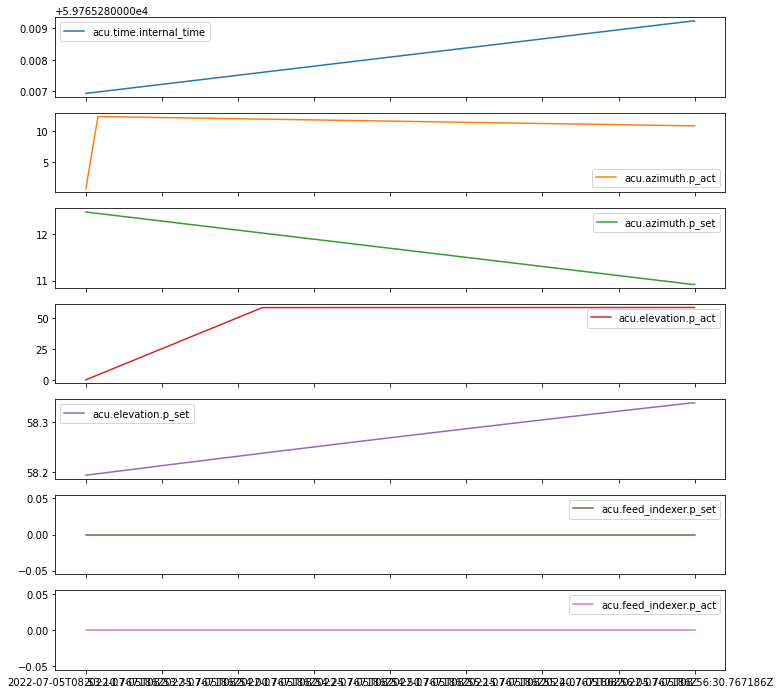

In [17]:
dfacu.plot(subplots=True, figsize=(12,12), style ='-')

In [19]:
cols = "caldav_uid, caldav_calendar, script_name, script_version, script_in_path, script_out_path, antenna_id, script_params_json, results_json, start_condition, time_initiated_iso, duration_expected_hr_dec, time_started_iso, time_finished_iso, status, errors, devices_json, needs_manual_upload, comments, forecasted_oc, papermill_json, aux_files_json, last_change_time_iso, change_history".split()
vals = "None, None, '', None, './examples/example_experiment.ipynb', None, 'test_antenna', '{}', '{}', '2022-07-05T11:58:36Z', '2022-07-05T11:58:36Z', 0.1, None, None, 'INITIALIZING', None, '[]', 0, '', ['4_DC', '4_DC | (percip=nanmm wind_speed=nanm/s, cloud=nan%, temp=nan_C)'], None, None, None, None".split()

dc = dict(zip(cols, vals))
dc

{'caldav_uid,': 'None,',
 'caldav_calendar,': 'None,',
 'script_name,': "'',",
 'script_version,': 'None,',
 'script_in_path,': "'./examples/example_experiment.ipynb',",
 'script_out_path,': 'None,',
 'antenna_id,': "'test_antenna',",
 'script_params_json,': "'{}',",
 'results_json,': "'{}',",
 'start_condition,': "'2022-07-05T11:58:36Z',",
 'time_initiated_iso,': "'2022-07-05T11:58:36Z',",
 'duration_expected_hr_dec,': '0.1,',
 'time_started_iso,': 'None,',
 'time_finished_iso,': 'None,',
 'status,': "'INITIALIZING',",
 'errors,': 'None,',
 'devices_json,': "'[]',",
 'needs_manual_upload,': '0,',
 'comments,': "'',",
 'forecasted_oc,': "['4_DC',",
 'papermill_json,': "'4_DC",
 'aux_files_json,': '|',
 'last_change_time_iso,': '(percip=nanmm',
 'change_history': 'wind_speed=nanm/s,'}

In [21]:
from mke_client.rimlib import Experiment

In [24]:
exp = Experiment(2, 'http://10.98.76.45:8990')

In [26]:
pth = exp.get_pathes_for_new_global_auxfiles('OCS')
pth

[['OCS',
  4,
  '/home/jovyan/meas/test_antenna/20220704_0519_2_test_antenna_exp_/data_aux/20220704_0519_IDP_2_OCS.csv']]

In [28]:
dc = exp.get_me()
dc

{'results_json': '{}',
 'time_initiated_iso': '2022-07-04T05:19:37Z',
 'needs_manual_upload': False,
 'start_condition': '2022-07-04T05:19:37Z',
 'status': 'POST_PROC_FAILED',
 'caldav_calendar': None,
 'time_started_iso': '2022-07-04T05:19:41Z',
 'change_history': '["N/A"]',
 'time_finished_iso': '2022-07-04T05:25:39Z',
 'script_in_path': './examples/example_experiment.ipynb',
 'comments': '',
 'script_out_path': '/home/jovyan/meas/test_antenna/20220704_0519_2_test_antenna_exp_/20220704_0519_2_test_antenna_exp_.html',
 'caldav_uid': None,
 'devices_json': '[]',
 'id': 2,
 'errors': "null'2'",
 'last_change_time_iso': '2022-07-04T05:25:48Z',
 'papermill_json': '{"default_parameters": {}, "duration": 353.81359, "end_time": "2022-07-04T05:25:35.024767", "environment_variables": {}, "exception": null, "input_path": "./examples/example_experiment.ipynb", "output_path": "/home/jovyan/meas/test_antenna/20220704_0519_2_test_antenna_exp_/20220704_0519_2_test_antenna_exp_.ipynb", "parameters": 

In [29]:
dc['aux_files_json']

'{"2": "/home/jovyan/meas/test_antenna/20220704_0519_2_test_antenna_exp_/data_aux/20220704_0519_IDP_2_OCS.txt", "4": "/home/jovyan/meas/test_antenna/20220704_0519_2_test_antenna_exp_/data_aux/20220704_0519_IDP_2_OCS.csv"}'